# Regression

본 코드는 선형회귀(Linear Regression)를 통해 주어진 데이터를 선형함수(Linear Function)로서 근사하는 과정입니다. 
아래의 예제를 통하여 목표함수를 학습하는 기계학습에서, 목표함수를 선형함수(Linear Function)로 근사하는 방법을 익힐 수 있습니다.

### 데이터 입력
활용하는 데이터는 UCI 신용평가 데이터(Credit Approval Dataset)로 13개의 Attribute(Independent Variable)와 1개의 Dependent Value로 이루어져 있습니다.

### 실제구현부
#### 통계적 접근
선형회귀는 목표함수를 선형함수(Linear Function)로서 근사하는 방법입니다. 따라서 가설 h는 다음과 같은 선형함수와 행렬의 곱 형태로 나타낼 수 있습니다. (X: m×n행렬, θ: n×1행렬)
$$h: f(\hat{x},\theta) = \theta_0 + \sum_{i=1}^n \theta_i x_i = \sum_{i=0}^n \theta_i x_i \to f(\hat{x},\theta) = X\theta$$

#### 선형회귀의 매개변수 θ 찾기
현실세계에서는 데이터에 잡음(Noise)이 들어가게 되는데 이를 표현해주기 위해 True function f(x,θ)에 n×1 벡터인 e를 더해주게 됩니다.
$$h: f(x,\theta) = \sum_{i=0}^n \theta_i x_i + e \to f=X\theta+e=Y$$

True function $f(x,θ)$와 가설 $f(\hat{x},θ)$의 차를 오차(Error)라고 부르는데, 이 오차의 제곱(Squared Error)을 최소화하는 방법으로 매개변수 θ를 찾을 수 있습니다.
$$\hat{\theta} = argmin_\theta(f-\hat{f})^2 \to \theta = (X^TX)^{-1}X^TY$$

근사한 선형회귀 그래프가 True function을 설명하기에 부족할 때, 단순회귀가 아닌 x의 고차항으로 이루어진 다항회귀(Polynomial Regression)를 이용할 수 있습니다. 이를 수식으로 나타내면 다음과 같습니다.
$$h: f(\hat{x},\theta) = \sum_{i=0}^n \sum_{j=1}^m \theta_{i,j} \phi_j(x_i)$$

In [1]:
'''
@ copyright: AAI lab (http://aailab.kaist.ac.kr/xe2/page_GBex27)
@ author: Moon Il-chul; icmoon@kaist.ac.kr
@ annotated by Kim Hyemi; khm0308@kaist.ac.kr
'''

import numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline

# X: Feature variable
# Y: Depedent variable
X = []
Y = []

f = open('X.csv', 'r')
csvReader = csv.reader(f)

for row in csvReader:
    X.append(row)
  
f = open('Y.csv', 'r')
csvReader = csv.reader(f)

for row in csvReader:
    Y.append(row)
   
f.close()

In [2]:
X = np.asarray(X, dtype = 'float64')
Y = np.asarray(Y, dtype = 'float64')

# 아래의 예제는 x의 1차항만 고려하는 선형회귀(Linear Regression) 모형입니다.

# xTemp: 13개의 Attribute 중 첫 번째 Attribute만 Feature varaible로 활용함 - xTemp[i]  =[1, x(i)]
# theta(θ): 오차의 제곱을 최소화하는 매개변수 값
# Y_est(= xTemp * θ): 위에서 구해진 tehta로 도출된 예측치

xTemp = X[:, 0:2]

theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xTemp), xTemp)), np.transpose(xTemp)), Y)

Y_est = np.dot(xTemp, theta)

# m0, c0 = argmin |Y - (m0 * xYemp + c0)|^2
# m1, c1 = argmin |Y_est - (m1 * xYemp + c1)|^2
m0, c0 = np.linalg.lstsq(xTemp, Y)[0]
m1, c1 = np.linalg.lstsq(xTemp, Y_est)[0]

In [3]:
# 아래의 예제는 x의 8차항으로 이루어진 다항회귀(Polynomial Regression) 모형입니다.

# newX: newX[i] = [1, x(i), x(i)^2, x(i)^3, x(i)^4, x(i)^5, x(i)^6, x(i)^7, x(i)^8]
# newTheta: 오차의 제곱을 최소화하는 매개변수 값
# newY_est(= newX * newθ): 위에서 구해진 newTehta로 도출된 예측치

newX = np.zeros((X.shape[0], 9))

newX[:, 0:2] = X[:, 0:2]

# X의 제곱항을 만들기 위하여 아래의 For-Loop를 활용함
for i in range(2, 9):
    newX[:, i] = newX[:, 1] * newX[:, i-1]

newTheta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(newX), newX)), np.transpose(newX)), Y)

newY_est = np.dot(newX, newTheta)

# m2, c2 = argmin |Y_est - (m2 * xYemp + c2)|^2
m2, c2 = np.linalg.lstsq(xTemp, newY_est)[0]

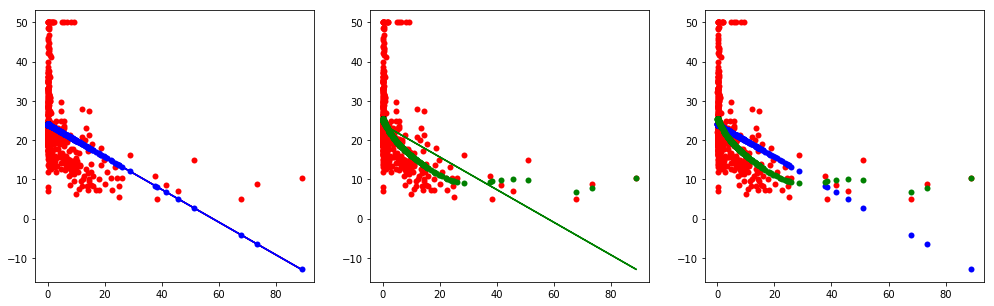

In [4]:
# 결과값을 그래프로 나타냄
# x축은 사용한 Feature Variable의 값이고, y축은 Dependent Variable의 값
plt.figure(1, figsize = (17, 5))

# 그래프 1
ax1 = plt.subplot(1, 3, 1)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], m0+c0*X[:, 1], 'r-')
plt.plot(X[:, 1], Y_est, 'bo', markeredgecolor = 'none')
plt.plot(X[:, 1], m1+c1*X[:, 1], 'b-')

# 그래프 2
ax2 = plt.subplot(1, 3, 2, sharey = ax1)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], newY_est, 'go', markeredgecolor = 'none')
plt.plot(X[:, 1], m2 + c2*X[:, 1], 'g-')

# 그래프3
ax3 = plt.subplot(1, 3, 3, sharey = ax2)
plt.plot(X[:, 1], Y, 'ro', markeredgecolor = 'none')
plt.plot(X[:, 1], Y_est, 'bo', markeredgecolor = 'none')
plt.plot(X[:, 1], newY_est, 'go', markeredgecolor = 'none')

plt.show()

### 결과해석부

#### 그래프 1
x의 1차항으로 이루어진 다항회귀 모형의 그래프입니다.
빨간색 점은 실제 데이터의 분포, 파랑색 점은 실제 데이터의 예측치, 파란색 선은 선형회귀 함수를 의미합니다.

#### 그래프 2
x의 8차항으로 이루어진 선형회귀 모형의 그래프입니다.
빨간색 점은 실제 데이터의 분포, 초록색점은 실제 데이터의 예측치, 초록색 선은 다항회귀 함수를 의미합니다.

#### 그래프 3
형회귀 모형과 다항회귀 모형을 비교한 그래프입니다.
빨간색 점은 실제 데이터의 분포, 파랑색 점은 선형회귀 모형의 예측치, 초록색 점은 다항회귀 모형의 예측치입니다.
위 그래프를 통해 다항회귀 그래프가 선형회귀 그래프보다 실제 데이터를 잘 설명하고 있음을 확인할 수 있습니다.